In [30]:
import pandas as pd
import numpy as np
import os
import cv2 as cv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
from skimage.transform import resize


def img_to_encoding(image):
    if image is None:
        return 0
    else:
        img = cv.resize(image,(160,160))
        #img = np.around(np.asarray(img)/255.0, decimals=12)
        #X = np.expand_dims(img, axis=0)
    return img

In [32]:
filepath = "gender_dataset_face/"

def load_image(filepath):
    
    labels = []
    temp = []
    for folder in os.listdir(filepath):
        label = folder
        for subfolder in os.listdir(filepath+folder):
            image_BGR = cv.imread(filepath + folder + "/" + subfolder)
            
            temp.append(img_to_encoding(image_BGR))
            if label == "woman":
                label1 = 1
            else:
                label1 = 0
        
            labels.append([label1])
    return temp,labels

In [33]:
os.listdir(filepath)

['man', 'woman']

In [34]:
data,labels = load_image(filepath)

In [35]:
labels[2301]

[1]

In [36]:
print(len(labels),len(data))

2307 2307


In [37]:
data = np.array(data)

In [38]:
data[0]

array([[[ 53,  81, 112],
        [ 63,  91, 123],
        [ 75, 104, 138],
        ...,
        [ 16,  18,  33],
        [ 17,  20,  32],
        [ 17,  19,  29]],

       [[ 59,  85, 117],
        [ 68,  96, 127],
        [ 73, 101, 135],
        ...,
        [ 13,  14,  22],
        [  6,   8,  13],
        [  0,   1,   4]],

       [[ 65,  90, 122],
        [ 55,  80, 112],
        [ 63,  91, 125],
        ...,
        [  4,   7,  11],
        [  0,   3,   4],
        [  0,   5,   3]],

       ...,

       [[ 81,  97, 166],
        [ 84, 100, 166],
        [ 88, 104, 164],
        ...,
        [223, 226, 231],
        [218, 221, 226],
        [226, 229, 234]],

       [[ 85, 101, 170],
        [ 87, 103, 169],
        [ 91, 107, 166],
        ...,
        [227, 230, 233],
        [221, 224, 227],
        [227, 229, 232]],

       [[ 86, 102, 170],
        [ 88, 104, 169],
        [ 94, 109, 167],
        ...,
        [224, 226, 226],
        [219, 221, 222],
        [231, 233, 233]]

In [39]:
data = data/255

In [40]:
data

array([[[[0.20784314, 0.31764706, 0.43921569],
         [0.24705882, 0.35686275, 0.48235294],
         [0.29411765, 0.40784314, 0.54117647],
         ...,
         [0.0627451 , 0.07058824, 0.12941176],
         [0.06666667, 0.07843137, 0.1254902 ],
         [0.06666667, 0.0745098 , 0.11372549]],

        [[0.23137255, 0.33333333, 0.45882353],
         [0.26666667, 0.37647059, 0.49803922],
         [0.28627451, 0.39607843, 0.52941176],
         ...,
         [0.05098039, 0.05490196, 0.08627451],
         [0.02352941, 0.03137255, 0.05098039],
         [0.        , 0.00392157, 0.01568627]],

        [[0.25490196, 0.35294118, 0.47843137],
         [0.21568627, 0.31372549, 0.43921569],
         [0.24705882, 0.35686275, 0.49019608],
         ...,
         [0.01568627, 0.02745098, 0.04313725],
         [0.        , 0.01176471, 0.01568627],
         [0.        , 0.01960784, 0.01176471]],

        ...,

        [[0.31764706, 0.38039216, 0.65098039],
         [0.32941176, 0.39215686, 0.65098039]

In [41]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.3,
                                                  random_state=42)

In [42]:
trainY = np.asarray(trainY).reshape(-1,)
testY = np.asarray(testY).reshape(-1,)

In [43]:
trainX.shape

(1614, 160, 160, 3)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers,regularizers

In [45]:
#convolutional model

cnn = tf.keras.models.Sequential([

      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid',input_shape=(160,160,3)),
      layers.MaxPool2D((2,2)),
      layers.BatchNormalization(axis=3),
      layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid'),
      layers.MaxPool2D((2,2)),
      layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid'),
      layers.MaxPool2D((2,2)),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(200,activation='relu'),
      layers.Dense(120,activation='relu'),
      layers.Dense(1,activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
#optimazation

cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [47]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 79, 79, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 79, 79, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 77, 77, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 38, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 36, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │    16,589,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,984,313 (64.79 MB)

 Trainable params: 16,984,185 (64.79 MB)

 Non-trainable params: 128 (512.00 B)

In [48]:
cnn.fit(trainX,trainY,epochs=15)

Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 741ms/step - accuracy: 0.5811 - loss: 1.7751
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 743ms/step - accuracy: 0.8485 - loss: 0.3685
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 823ms/step - accuracy: 0.8989 - loss: 0.2523
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 922ms/step - accuracy: 0.8868 - loss: 0.2454
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 48s 930ms/step - accuracy: 0.9081 - loss: 0.2124
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 878ms/step - accuracy: 0.9436 - loss: 0.1571
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 891ms/step - accuracy: 0.9385 - loss: 0.1483
Epoch 8/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 896ms/step - accuracy: 0.9569 - loss: 0.1006
Epoch 9/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 893ms/step - accuracy: 0.9597 - loss: 0.1179
Epoch 10/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 44s 871ms/step - accuracy: 0.9608 - loss: 0.0878
Epoch 11/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 875ms/step - accuracy: 0.9568 - loss: 0.1009
Epoch 12/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 45

In [49]:
cnn.evaluate(testX,testY)

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.9089 - loss: 0.3083


[0.34340253472328186, 0.8989899158477783]

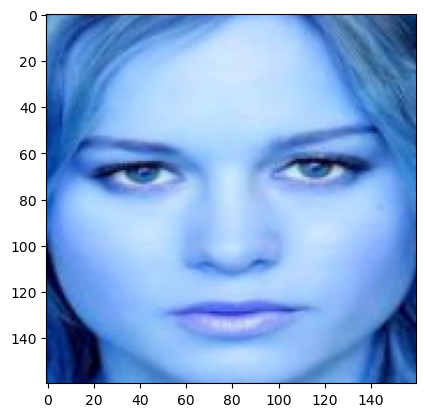

In [50]:
plt.imshow(testX[0])

In [51]:
y_pred = cnn.predict(testX)

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step


In [52]:
predY = []
for i in y_pred:
    if i[0] > 0.5:
        predY.append(1)
    else:
        predY.append(0)

In [53]:
predY = np.array(predY)

In [54]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(testY,predY))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       363
           1       0.94      0.85      0.89       330

    accuracy                           0.90       693
   macro avg       0.90      0.90      0.90       693
weighted avg       0.90      0.90      0.90       693



In [55]:
accuracy_score(testY,predY)

0.898989898989899

In [56]:
# save the model to disk
cnn.save('gender_classification1.h5')

In [57]:
testY

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [58]:
predY

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,